# Exploratory Data Analysis

## Understanding the Problem

SpaceX advertises on its website Falcon 9 rocket launches with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage.

Therefore if we will try to determine whether the first stage will land successfully or not.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

## Required Libraries

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [293]:
df = pd.read_csv("data\data_cleaned.csv")

In [294]:
print(f'df shape: {df.shape}')
df.head()

df shape: (168, 17)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,0,1,False,False,False,No Pad,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,0,1,False,False,False,No Pad,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,0,1,False,False,False,No Pad,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,0,1,False,False,False,No Pad,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,0,1,False,False,False,No Pad,1.0,0,B1004,-80.577366,28.561857


## Data Overview

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    168 non-null    int64  
 1   Date            168 non-null    object 
 2   BoosterVersion  168 non-null    object 
 3   PayloadMass     168 non-null    float64
 4   Orbit           168 non-null    object 
 5   LaunchSite      168 non-null    object 
 6   Outcome         168 non-null    int64  
 7   Flights         168 non-null    int64  
 8   GridFins        168 non-null    bool   
 9   Reused          168 non-null    bool   
 10  Legs            168 non-null    bool   
 11  LandingPad      168 non-null    object 
 12  Block           168 non-null    float64
 13  ReusedCount     168 non-null    int64  
 14  Serial          168 non-null    object 
 15  Longitude       168 non-null    float64
 16  Latitude        168 non-null    float64
dtypes: bool(3), float64(4), int64(4), o

### Dataset Information

- FlightNumber: Sequential number assigned to each SpaceX launch.
- Date: Launch date of the mission.
- BoosterVersion: Specific Falcon 9 booster version used for the mission.
- PayloadMass: Mass of the payload carried by the rocket (in kilograms).
- Orbit: Type of orbit the payload was delivered to (e.g., LEO, GTO).
- LaunchSite: Location from where the rocket was launched.
- Outcome: Binary indicator of mission outcome (success/failure).
- Flights: Number of flights completed by the booster.
- GridFins: Whether grid fins were present on the booster (True/False).
- Reused: Whether the booster was previously reused (True/False).
- Legs: Whether the booster had landing legs (True/False).
- LandingPad: Landing location of the booster (e.g., drone ship, ground pad).
- Block: Version block of the Falcon 9 booster, indicating design upgrades.
- ReusedCount: Number of times the booster had been reused before the flight.
- Serial: Unique identifier for the rocket booster.
- Longitude: Longitude coordinate of the launch site.
- Latitude: Latitude coordinate of the launch site.

In [296]:
df['LandingPad'].value_counts()

LandingPad
LZ-1      57
OCISLY    39
No Pad    26
JRTI      20
LZ-2      18
LZ-4       6
ASOG       2
Name: count, dtype: int64

| Column          | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| FlightNumber    | Sequential number assigned to each SpaceX launch.                          |
| Date            | Launch date of the mission.                                                |
| BoosterVersion  | Specific Falcon 9 booster version used for the mission.                     |
| PayloadMass     | Mass of the payload carried by the rocket (in kilograms).                   |
| Orbit           | Type of orbit the payload was delivered to (e.g., LEO, GTO).                |
| LaunchSite      | Location from where the rocket was launched.                                |
| Outcome         | Binary indicator of mission outcome (success = 1, failure = 0).             |
| Flights         | Number of flights completed by the booster.                                 |
| GridFins        | Whether grid fins were present on the booster (True/False).                 |
| Reused          | Whether the booster was previously reused (True/False).                     |
| Legs            | Whether the booster had landing legs (True/False).                          |
| LandingPad      | Landing location of the booster (e.g., drone ship, ground pad).             |
| Block           | Version block of the Falcon 9 booster, indicating design upgrades.          |
| ReusedCount     | Number of times the booster had been reused before the flight.              |
| Serial          | Unique identifier for the rocket booster.                                   |
| Longitude       | Longitude coordinate of the launch site.                                    |
| Latitude        | Latitude coordinate of the launch site.                                     |


In [297]:
categorical_variables = [col for col in df.columns if df[col].dtypes == 'O']
numerical_variables = [col for col in df.columns if df[col].dtypes != 'O']

print(f'The dataset has {len(categorical_variables)} categorical variables: {categorical_variables}')
print(f'The dataset has {len(numerical_variables)} numerical variables: {numerical_variables}')

The dataset has 6 categorical variables: ['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'LandingPad', 'Serial']
The dataset has 11 numerical variables: ['FlightNumber', 'PayloadMass', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Longitude', 'Latitude']


## Univariate Analysis

### Univariate Analysis for Categorical Variable

In [298]:
df[['Orbit', 'LaunchSite','Flights', 'GridFins', 'Reused', 'Legs', 'Block','LandingPad']].astype('object').describe(include= 'all')

,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,LandingPad
count,168,168,168,168,168,168,168.0,168
unique,12,3,13,2,2,2,5.0,7
top,VLEO,CCSFS SLC 40,1,True,True,True,5.0,LZ-1
freq,54,93,60,148,108,149,117.0,57


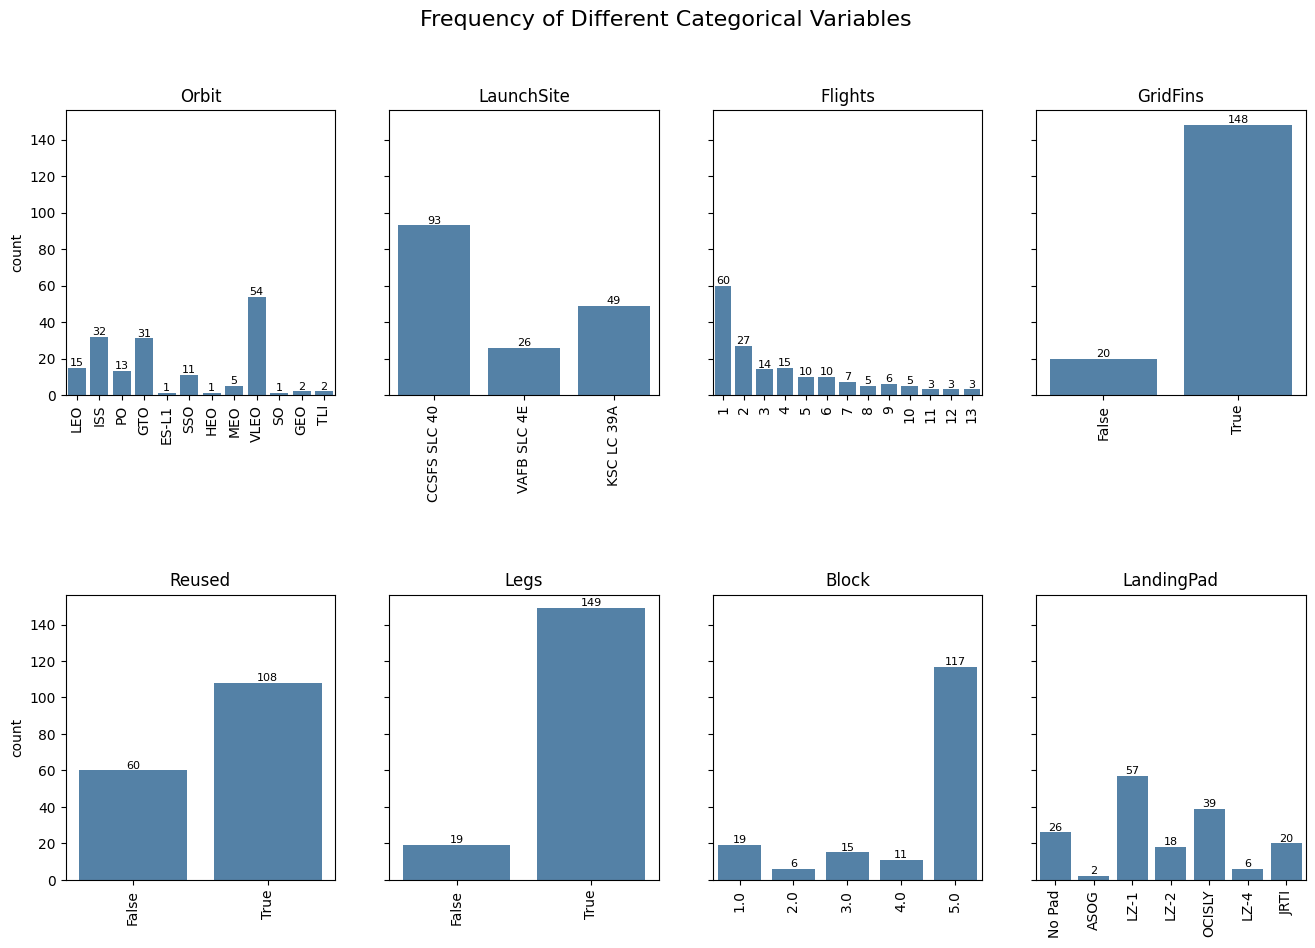

In [ ]:
fig, axes = plt.subplots(2, 4, figsize= (16, 10), sharey= True)
fig.suptitle('Frequency of Different Categorical Variables', fontsize= 16)

for i, col in enumerate(['Orbit', 'LaunchSite','Flights', 'GridFins', 'Reused', 'Legs', 'Block','LandingPad']):
    ax = plt.subplot(2, 4, i+1)
    sns_bar = sns.countplot(
        data= df,
        x= col,
        ax=ax,
        #hue= 'Outcome',
        color= 'steelblue'
    )
    plt.xticks(rotation=90)
    plt.title(col)
    plt.xlabel(None)
    for container in sns_bar.containers:
        plt.bar_label(container, fontsize= 8, padding= 0)

plt.subplots_adjust(hspace=0.7)
plt.show()

Key Observations from Univariate Analysis

Orbit: The most common orbits for Falcon 9 launches are VLEO (Very Low Earth Orbit), LEO (Low Earth Orbit), GTO (Geostationary Transfer Orbit), and ISS (International Space Station). This reflects the high frequency of commercial, government, and resupply missions.

LaunchSite: The CCSFS SLC 40 (Cape Canaveral Space Force Station Space Launch Complex 40) is the most frequently used launch site, indicating it's a primary hub for SpaceX. The other two sites, VAFB SLC 4E and KSC LC 39A, have fewer launches but are still significant.

Flights: The plot shows that a large number of boosters were on their first flight (Flights = 1), with the count dropping off steeply for subsequent flights. This is expected as reusability was a gradual process.

GridFins & Legs: The plots for these boolean variables show a significant majority of launches utilized grid fins and legs, which are essential components for a controlled landing. This high count is a direct reflection of SpaceX's focus on booster recovery.

Reused: The number of launches with a reused booster (True) is higher than those with a new booster (False). This highlights the increasing success and adoption of reusability in SpaceX's operations.

Block: The plot for Block shows that most of the missions used a Block 5 booster. This is consistent with SpaceX's production history, where Block 5 was the final and most reusable version of the Falcon 9.

LandingPad: The LandingPad plot shows that a significant number of missions did not attempt a landing on a pad ("No Pad"), while others used specific pads identified by their serial numbers.

### Univariate Analysis for Numerical Variable

In [300]:
df[numerical_variables].describe()

,FlightNumber,PayloadMass,Outcome,Flights,Block,ReusedCount,Longitude,Latitude
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,98.190476,8191.079110,0.815476,3.732143,4.196429,5.500000,-86.780776,29.514774
std,52.169571,5144.814299,0.389070,3.241707,1.385377,4.681471,14.519168,2.196342
min,6.000000,330.000000,0.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,51.750000,3457.000000,1.000000,1.000000,4.000000,1.000000,-80.603956,28.561857
50%,100.500000,8191.079110,1.000000,2.000000,5.000000,5.000000,-80.577366,28.561857
75%,143.250000,13260.000000,1.000000,5.250000,5.000000,9.000000,-80.577366,28.608058
max,187.000000,15600.000000,1.000000,13.000000,5.000000,13.000000,-80.577366,34.632093


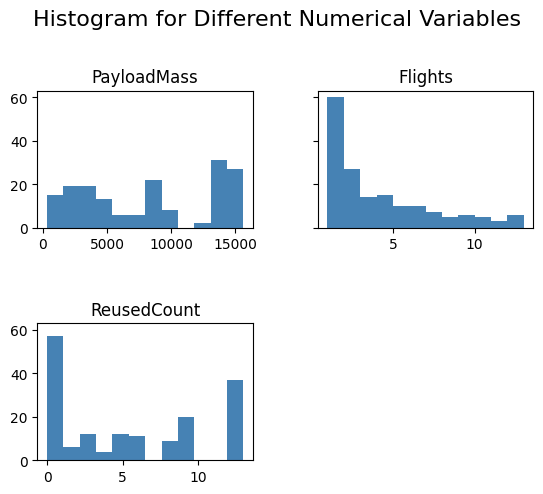

In [317]:
df[['PayloadMass', 'Flights', 'ReusedCount']].hist(bins= 12, sharey= True, color= 'steelblue', grid= False)
plt.suptitle("Histogram for Different Numerical Variables", size = 16, y = 1.05)
plt.subplots_adjust(hspace=0.7)
plt.show()

Key Observations from Histogram

PayloadMass: The histogram for payload mass shows a multi-modal distribution, indicating that SpaceX launches a variety of missions with distinct mass requirements. There isn't a single most common payload mass.

Flights: The histogram for flights is highly right-skewed. The majority of missions in the dataset were a booster's first flight, with a sharp decline in frequency for subsequent flights. 

ReusedCount: Similar to Flights, the ReusedCount distribution is also right-skewed, with the majority of boosters having a count of 0 meaning they were new, or a count of 1 or 2. But, some were also reused many times.

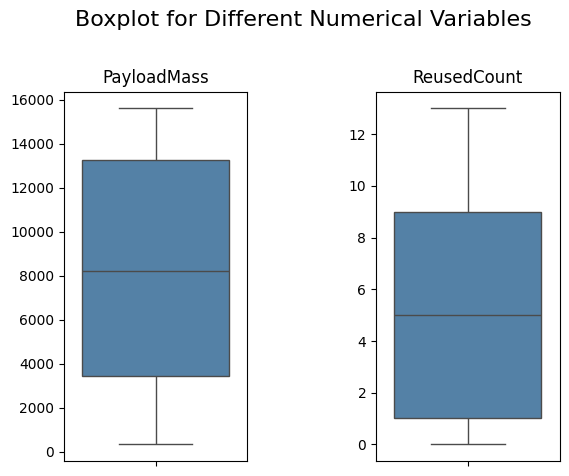

In [302]:
fig, axes = plt.subplots(1,2)
fig.suptitle("Boxplot for Different Numerical Variables", size = 16, y = 1.05)
for i, col in enumerate(['PayloadMass', 'ReusedCount']):
    ax = plt.subplot(1, 2, i+1)
    sns_box = sns.boxplot(df[col], ax= ax, color= 'steelblue')
    plt.ylabel(None)
    plt.title(col)

plt.subplots_adjust(wspace=0.7)
plt.show()

PayloadMass: The box plot shows a median payload mass of approximately 8,000 kg. But it fails to show the multi-modality, which can be shown by Violin Plot.

ReusedCount: The box plot for ReusedCount confirms the right-skewed nature of the data, with the median at 5. It also shows a wide range, indicating that some boosters have been reused many times.

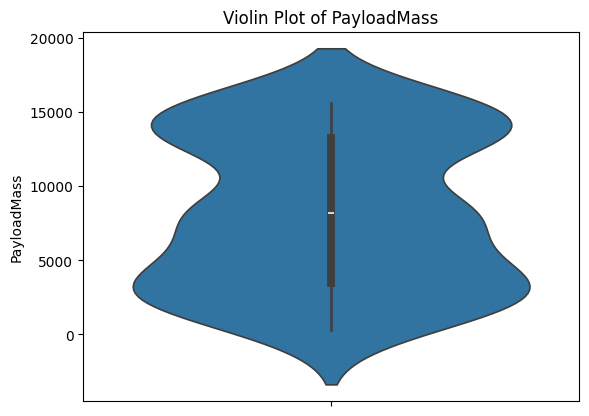

In [303]:
plt.Figure(figsize= (3, 6))
sns.violinplot(df['PayloadMass'])
plt.title('Violin Plot of PayloadMass')
plt.show()

The violin plot for PayloadMass clearly reveals a multi-modal distribution, showing several distinct peaks.

## Bivariate Analysis

### Relation between Outcome and Different Categorical Variables

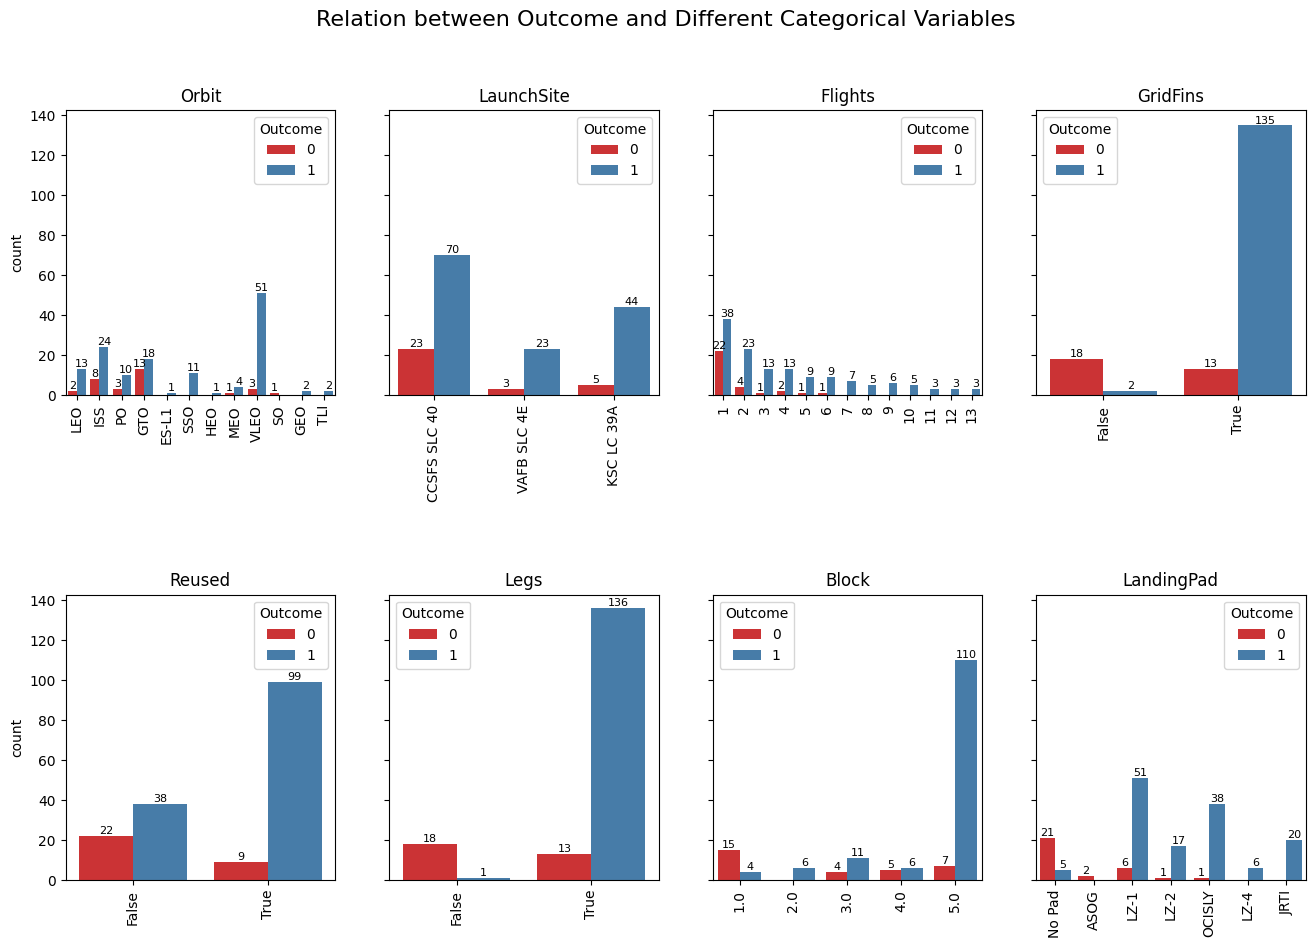

In [304]:
fig, axes = plt.subplots(2, 4, figsize= (16, 10), sharey= True)
fig.suptitle('Relation between Outcome and Different Categorical Variables', fontsize= 16)

for i, col in enumerate(['Orbit', 'LaunchSite','Flights', 'GridFins', 'Reused', 'Legs', 'Block','LandingPad']):
    ax = plt.subplot(2, 4, i+1)
    sns_bar = sns.countplot(
        data= df,
        x= col,
        ax=ax,
        hue= 'Outcome',
        palette= 'Set1'
    )
    plt.xticks(rotation=90)
    plt.title(col)
    plt.xlabel(None)
    for container in sns_bar.containers:
        plt.bar_label(container, fontsize= 8, padding= 0)

plt.subplots_adjust(hspace=0.7)
#fig.delaxes(axes[1, 3])
plt.show()

Orbit:<br>
VLEO, LEO and ISS orbits have a very high success rate, while other orbits, like GTO, have a lower success rate, suggesting they are more challenging for landing.

LaunchSite:<br>
The KSC LC 39A and VAFB SLC 4E launch sites have a much higher success rate compared to CCSFS SLC 40, indicating the launch location is a key factor in landing success. 

GridFins, Reused, and Legs:<br>
It is obvious from the graph that a high number of successful landings occurred when these components were used, confirming their importance in the recovery process. 

Block:<br>
The Block 5 booster, in particular, shows a high success rate.

LandingPad:<br>
Without landing pad, the success rate is very low.

### Relation between Flight Number and Payload Mass

We can plot out the FlightNumber vs. PayloadMass and overlay the outcome of the launch. 

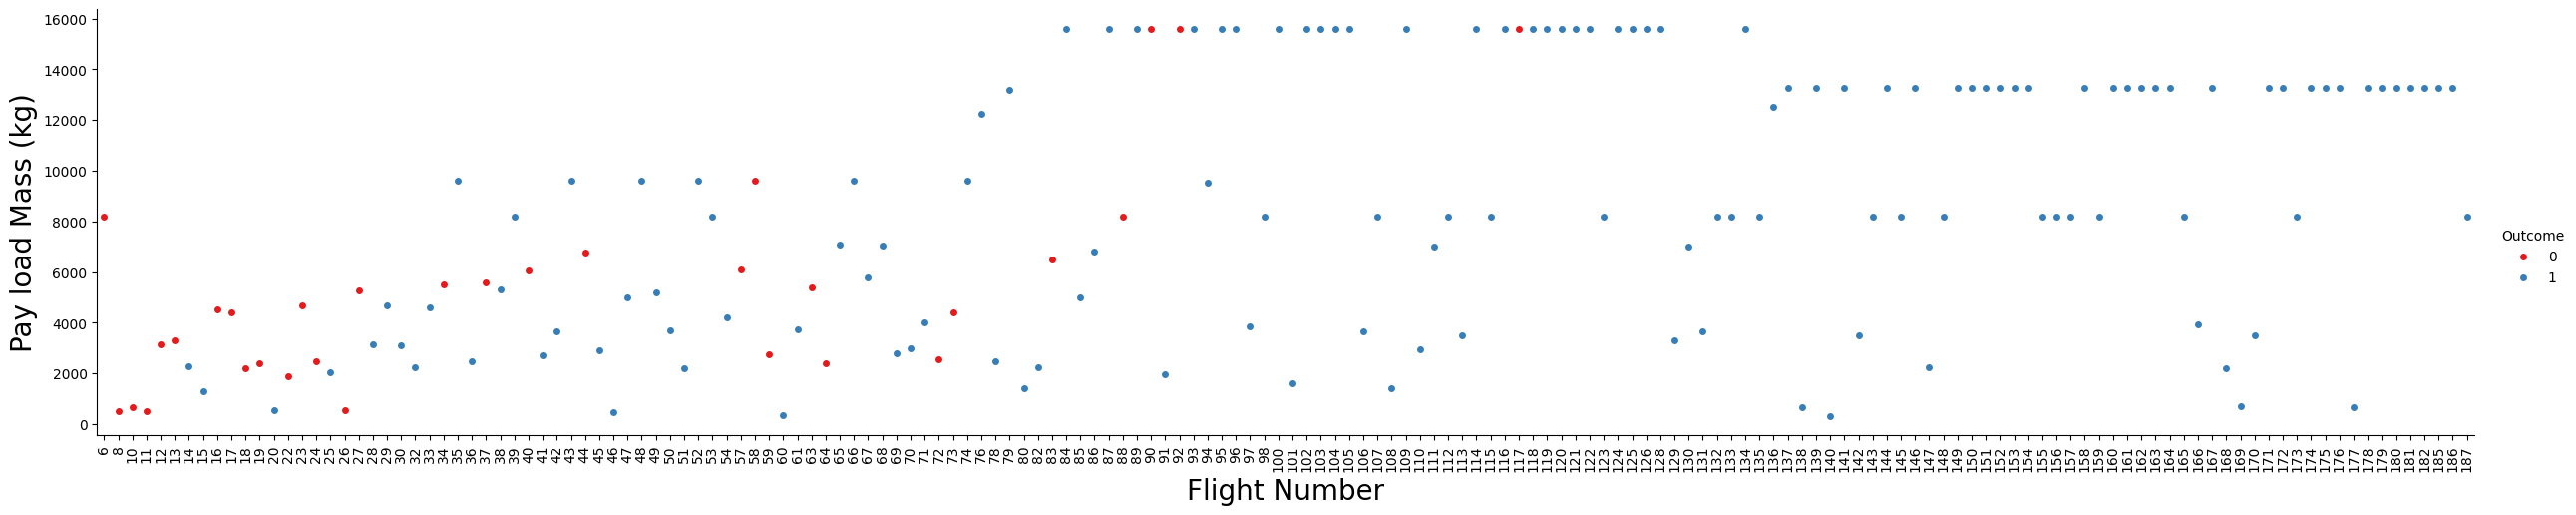

In [305]:
sns.catplot(data = df,
            x = 'FlightNumber',
            y = 'PayloadMass',
            hue = 'Outcome',
            palette = "Set1",
            aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.xticks(rotation = 90)
plt.show()

We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the more likely the first stage will return.

### Relation between Flight Number and Launch Site

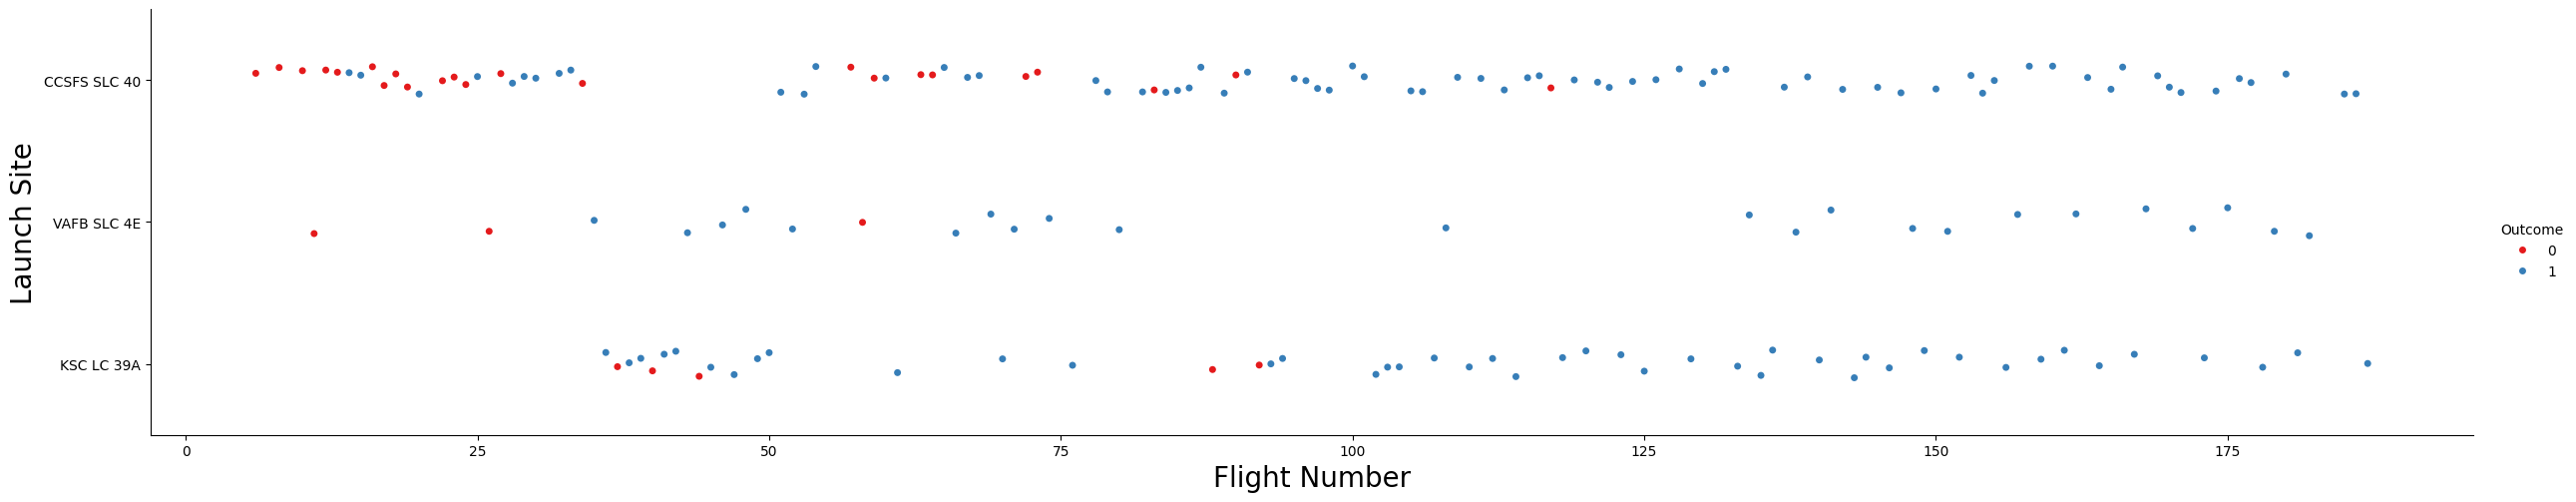

In [306]:
sns.catplot(data = df,
            x = 'FlightNumber',
            y = 'LaunchSite',
            hue = 'Outcome',
            palette = "Set1",
            aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

We can see that, although around half of launches were from CCAFS SLC 40 launch site, VAFB SLC 4E and KSC LC 39A have higher success rates. The success rate from CCAFS SLC 40 launch site increased with flight number.

### Relation between Payload Mass and Launch Site

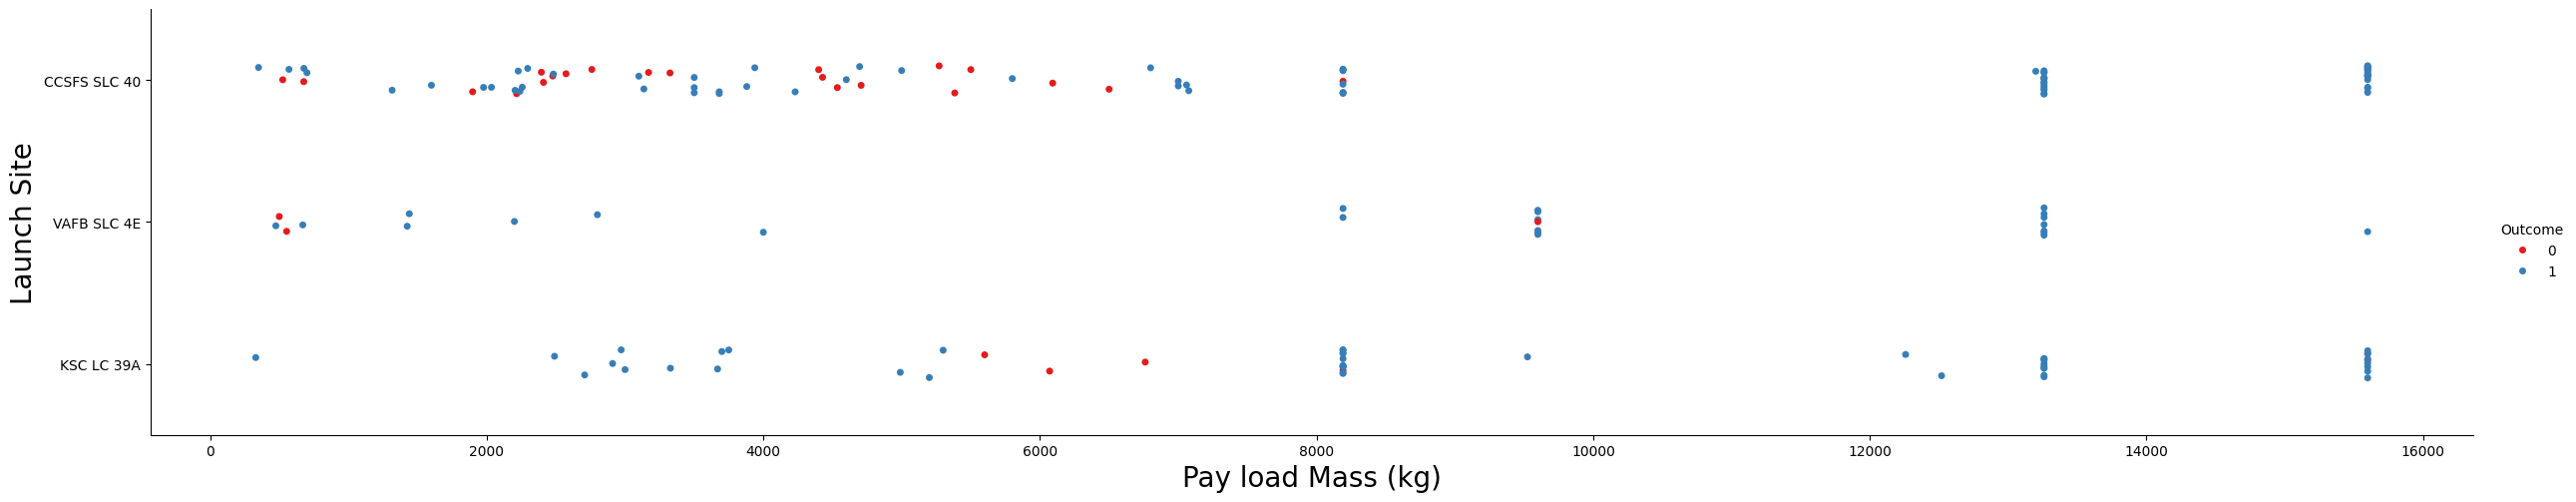

In [307]:
sns.catplot(data = df,
            x = 'PayloadMass',
            y = 'LaunchSite',
            hue = 'Outcome',
            palette = "Set1",
            aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Typically, higher the payload mass (kg), higher the success rate. 

Most launces with a payload greater than 7,000 kg were successful

### Relation between Launch Site and Orbit Type

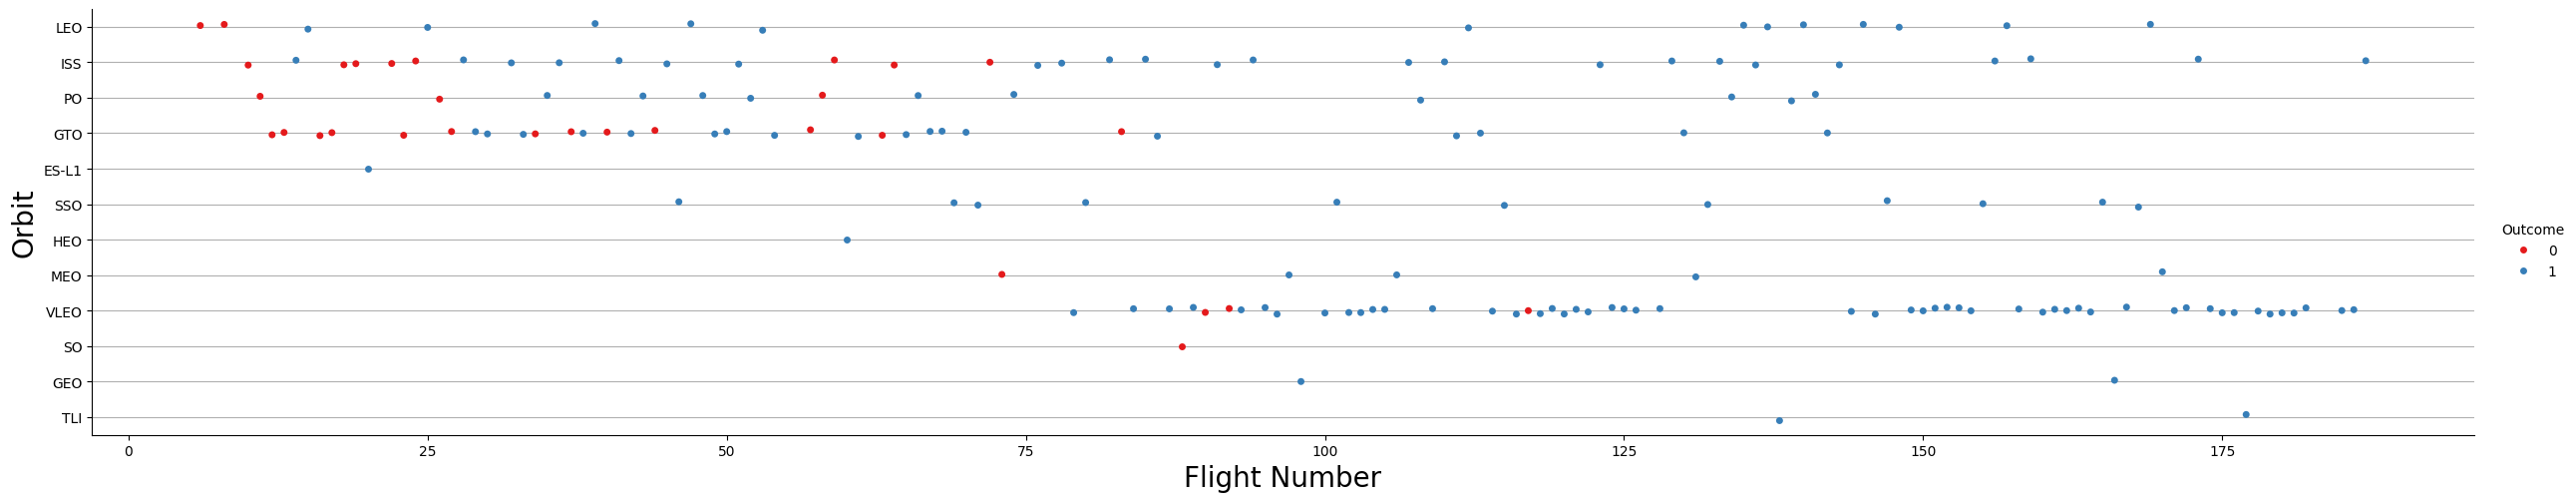

In [308]:
sns.catplot(data = df,
            x = 'FlightNumber',
            y = 'Orbit',
            hue = 'Outcome',
            palette = "Set1",
            aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid(axis= 'y')
plt.show()

We can see that in the LEO, ISS, and VLEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Relation between Payload Mass and Orbit Type

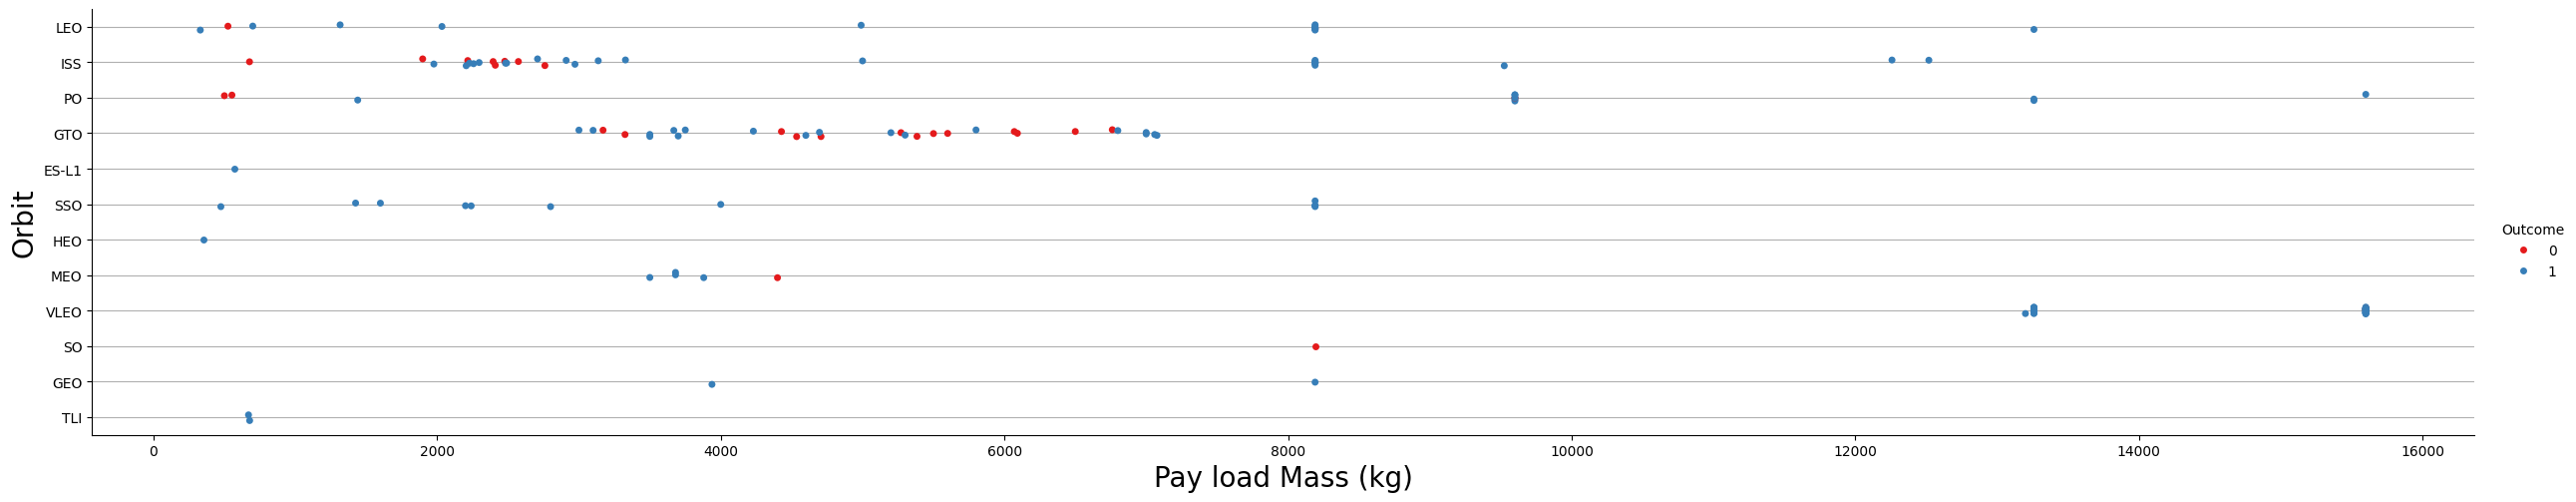

In [309]:
sns.catplot(data = df,
            x = 'PayloadMass',
            y = 'Orbit',
            hue = 'Outcome',
            palette = "Set1",
            aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.grid(axis= 'y')
plt.show()

With heavy payloads the successful landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing are both there.

### Success Rate of Each Orbit Type

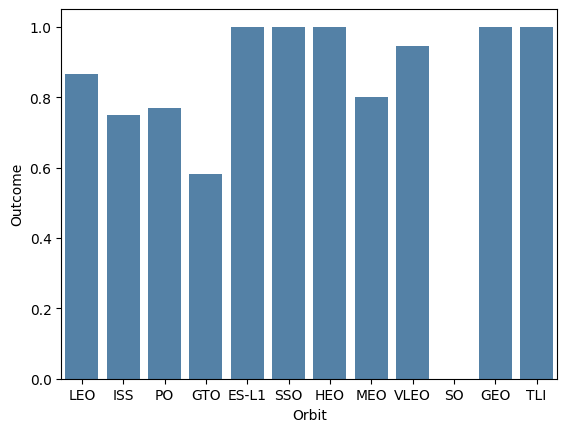

In [310]:
sns.barplot(data= df,
            x= 'Orbit',
            y= 'Outcome',
            errorbar= None,
            color= 'steelblue')
plt.show()

Insights

- Orbits with 100% success rate:<br>
ES-L1, GEO, HEO, SSO

- Orbits with 0% success rate:<br>
SO

- Orbits with success rate between 50% and 85%:<br>
GTO, ISS, LEO, MEO, PO

### Success Rate of Each Launch Site

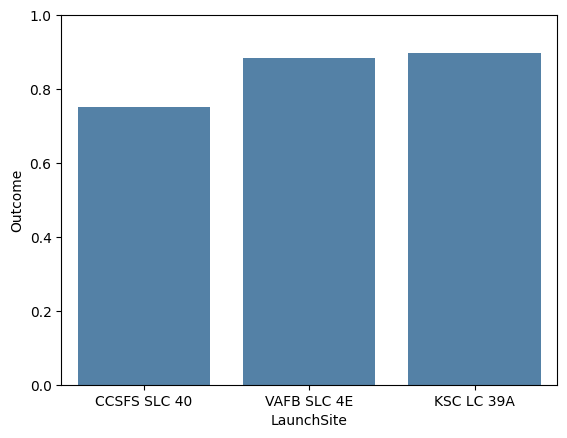

In [311]:
sns.barplot(data= df,
            x= 'LaunchSite',
            y= 'Outcome',
            errorbar= None,
            color= 'steelblue')
plt.ylim(0,1)
plt.show()

Insights

Success rate for VAFB SLC 4E and KSC LC 39A are higher than CCSFS SLC 40

## Correlation and Heat Map

In [312]:
corr_matrix = df.drop(['Longitude', 'Latitude'], axis= 1).corr(numeric_only= True)
corr_matrix[['Outcome']].sort_values('Outcome')

,Outcome
PayloadMass,0.270473
Flights,0.302410
Reused,0.349981
ReusedCount,0.491489
FlightNumber,0.507686
Block,0.534239
GridFins,0.678028
Legs,0.702244
Outcome,1.000000


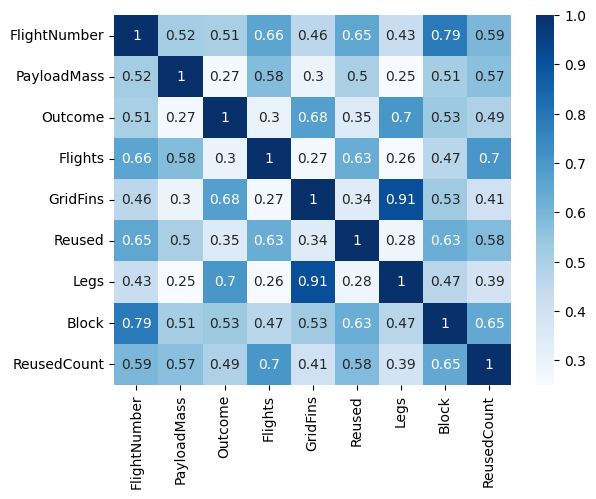

In [313]:
sns.heatmap(corr_matrix,
            annot= True,
            cmap= 'Blues')
plt.show()

Correlation with Outcome: <br>
The Outcome variable shows a moderately strong positive correlation with Reused (0.63), Legs (0.7), and GridFins (0.68). This confirms that a successful landing is highly dependent on the presence of these key recovery components. <br>
It also has a positive correlation with FlightNumber (0.51) and Block (0.65), indicating that the success rate improved over time with technological upgrades.

Inter-Feature Correlation: <br>
Several independent variables are highly correlated with each other. For example, Flights and ReusedCount have a strong positive correlation (0.7), which is expected since a higher number of flights directly leads to more reuses. <br>
Similarly, GridFins and Legs are highly correlated (0.91), as a booster with one component for landing also has the other.

## Yearly Trend of Landing Success

In [314]:
year_success_df = df.groupby(pd.to_datetime(df['Date']).dt.year)['Outcome'].mean().reset_index()
year_success_df

,Date,Outcome
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.880000


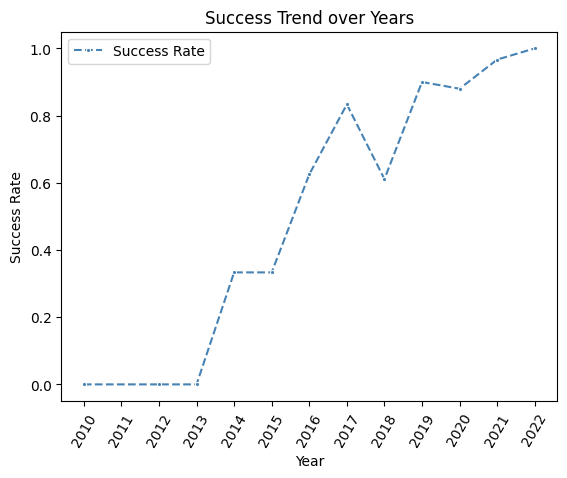

In [315]:
plt.Figure(figsize= (10,5))
sns.lineplot(data= year_success_df,
             x = 'Date',
             y = 'Outcome',
             linestyle = '--',
             color = 'steelblue',
             marker = '.',
             label = 'Success Rate')
plt.xticks(list(range(2010, 2023)),
           rotation= 60)
plt.title('Success Trend over Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

The line plot clearly shows a significant upward trend in the landing success rate over the years. The success rate remained at zero until 2013, after which it kept increasing.

Though it plummeted sharply in 2018, it quickly recovered and resumed its upward trajectory from 2019 onward. This plot shows how SpaceX's consistent improvement over time sets it apart from the competition.